In [2049]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
import math
from tqdm import tqdm

In [2124]:
def tet_sim_lethal_inf(N,time):
    # array to store fitness
    fits = np.zeros(time)
    fits[0] =.6
    #counts = np.array([int(.5*N),int(.5*N)])
    #intial fitness
    fit=0
    #initialize 'time ' counter
    dt= 1
    picks = np.array([0,0])
    # main loop
    while dt<time and picks[1]==0 :
        #draw a random set of four binary variables
        picks = np.bincount(np.random.randint(0,2,4),minlength=2)
        #counts -=picks
        # calc and store fitness - under rule in which one mutant subunit is lethal
        fits[dt] = (picks[1]==0)*1
        
        
        dt+= 1
    return fits



def tet_sim_const_inf(ftime,fit_loss ):
    
    fits =np.zeros(time)# initialize array for fitness
    fits[0]=.6
    tets = np.zeros(time)
    tets[0] =1
   
    fit_arr =np.ones(5)
    fit_arr[1:] = .5
    #counts = np.array([int(.5*N),int(.5*N)])
    # initialize time counter
    dt= 1 # initialize time counter
    picks = np.array([0,0]) # initalize variable for first step (might be extraneous)
    #thresh = .01
    fit = 0 # initial fitness
    # main loop
    while dt<time :
        picks = np.bincount(np.random.randint(0,2,4),minlength=2) #draw a random set of four binary variables
        #counts -=picks
        #tets[dt] = picks[1]
        #tets[dt] = np.random.randint(5)
        fit +=  fit_arr[int(picks[1])] #calculate fitness by constant model
        #print(fit)
        
        fits[dt] =fit/dt # store fitness
        tets[dt] = picks[1]
        
        dt+= 1 #advance time 
    return fits,tets
    
    
def tet_sim_lin_inf(time,fit_loss ):
    fits =np.zeros(time) # initialize array for fitness
    tets = np.zeros(time)
    fits[0]=1
    tets[0] =1
    #counts = np.array([int(.5*N),int(.5*N)])
    dt= 1 # initialize time counter
    picks = np.array([0,0]) # initalize variable for first step (might be extraneous)
    #thresh = .01
    fit = 0 # initial fitness
    fit_arr =np.ones(5)
    fit_arr =1-np.arange(5)*fit_loss/4
    while dt<time :
        picks = np.bincount(np.random.randint(0,2,4),minlength=2) #draw a random set of four binary variables
        #counts -=picks
        #tets[dt] = picks[1]
        #tets[dt] = np.random.randint(5)
        fit += fit_arr[int(picks[1])] #calculate fitness by linear model
        
        fits[dt] =fit/dt # store fitness
        tets[dt] = picks[1]
        
        
        dt+= 1  #advance time 
    return fits, tets

def tet_sim_geo_inf(time,fit_loss ):
    fits =np.zeros(time) # initialize array for fitness
    tets = np.zeros(time)
    fits[0]=1
    tets[0] =0
    #counts = np.array([int(.5*N),int(.5*N)])
    dt= 1 # initialize time counter
    picks = np.array([0,0]) # initalize variable for first step (might be extraneous)
    #thresh = .01
    fit = 0
    fit_arr =np.ones(5)
    fit_arr =(1- (fit_loss/2**4)*2**np.arange(5))
    while dt<time :
        picks = np.bincount(np.random.randint(0,2,4),minlength=2)
        #counts -=picks
        #tets[dt] = picks[1]
        #tets[dt] = np.random.randint(5,)
        fit += fit_arr[int(picks[1])] #calculate fitness by geometric model
        
        fits[dt] =fit/dt
        tets[dt] = picks[1]
        
        
        dt+= 1
    return fits, tets



# def tet_sim_const_inf_a(N,time,fit_loss ):
#     #fit_loss =1 - (avg_fit_loss*5-1) /5
#     fits =np.zeros(time)
#     fit_hist=np.zeros(time)
#     fits[0]=1
#     fit_hist[0] =1
#     counts = np.array([int(.5*N),int(.5*N)])
#     dt= 1
#     picks = np.array([0,0])
#     thresh = .01
#     fit = 0
#     while dt<time :
#         picks = np.bincount(np.random.randint(0,2,4),minlength=2)
#         #counts -=picks
#         #tets[dt] = picks[1]
#         fit += (1- (picks[1]!=0)*fit_loss)
#         #print(fit)
#         fit_hist[dt]= (1- (picks[1]!=0))*(fit_loss)
#         fits[dt] =fit/dt
        
        
#         dt+= 1
#     return fits, fit_hist
    
    
# def tet_sim_lin_inf_a(N,time,avg_fit_loss ):
#     fits =np.zeros(time)
#     fit_hist=np.zeros(time)
#     tets = np.zeros(time)
#     fits[0]=1
#     tets[0] =0
#     counts = np.array([int(.5*N),int(.5*N)])
#     dt= 1
#     picks = np.array([0,0])
#     thresh = .01
#     fit = 0
#     while dt<time :
#         picks = np.bincount(np.random.randint(0,2,4),minlength=2)
#         #counts -=picks
#         #tets[dt] = picks[1]
#         fit += (1- picks[1]*fit_loss/4)
#         fit_hist[dt]= (1- picks[1]*fit_loss/4)
#         fits[dt] =fit/dt
        
        
#         dt+= 1
#     return fits

# def tet_sim_geo_inf_a(N,time,avg_fit_loss ):
#     fits =np.zeros(time)
#     tets = np.zeros(time)
#     fits[0]=1
#     tets[0] =0
#     counts = np.array([int(.5*N),int(.5*N)])
#     dt= 1
#     picks = np.array([0,0])
#     thresh = .01
#     fit = 0
#     while dt<time :
#         picks = np.bincount(np.random.randint(0,2,4),minlength=2)
#         #counts -=picks
#         #tets[dt] = picks[1]
#         fit += (1- (fit_loss/2**4)*2**picks[1])
        
#         fits[dt] =fit/dt
        
        
#         dt+= 1
#     return fits
    
    
    
    

In [2368]:
time= 100
samp =5000

arr_const_min=np.zeros((samp,2,time))
arr_lin_min=np.zeros((samp,2,time))
arr_geo_min=np.zeros((samp,2,time))

for n in range(samp):
    arr_const_min[n] = tet_sim_const_inf(time,.5 )
    arr_lin_min[n] = tet_sim_lin_inf(time,.5 )
    arr_geo_min[n] = tet_sim_geo_inf(time,.5 )
    
    
    

In [2445]:
P_m = [binom(4,.5).pmf(i) for i in np.arange(5)]
fits_const =  np.ones(5)
fits_const[1:] = 0
fits_geo = np.array([1,8/16,4/16,2/16,0/16])
fits_lin = np.array([1,12/16,8/16,4/16,0/16])

const_avg = np.dot(fits_const,P_m)
lin_avg = np.dot(fits_lin,P_m)
geo_avg =np.dot(fits_geo,P_m)


N_space = np.linspace(1,99,99)
fits_const_std = np.dot(np.array(P_m),(fits_const-const_avg)**2)/N_space
fits_lin_std = np.dot(np.array(P_m),(fits_lin-lin_avg)**2)/N_space
fits_geo_std = np.dot(np.array(P_m),(fits_geo-geo_avg)**2)/N_space

In [2446]:
fits_const_std**.5

array([0.24206146, 0.1711633 , 0.13975425, 0.12103073, 0.10825318,
       0.09882118, 0.09149063, 0.08558165, 0.08068715, 0.07654655,
       0.07298428, 0.06987712, 0.06713577, 0.06469365, 0.0625    ,
       0.06051536, 0.05870853, 0.05705443, 0.05553271, 0.05412659,
       0.05282214, 0.05160768, 0.0504733 , 0.04941059, 0.04841229,
       0.04747216, 0.04658475, 0.04574532, 0.04494968, 0.04419417,
       0.04347552, 0.04279082, 0.04213749, 0.0415132 , 0.04091585,
       0.04034358, 0.03979466, 0.03926755, 0.03876085, 0.03827328,
       0.03780365, 0.03735089, 0.03691403, 0.03649214, 0.03608439,
       0.03569002, 0.03530829, 0.03493856, 0.03458021, 0.03423266,
       0.03389538, 0.03356788, 0.0332497 , 0.03294039, 0.03263956,
       0.03234682, 0.03206182, 0.03178423, 0.03151372, 0.03125   ,
       0.03099279, 0.03074184, 0.03049688, 0.03025768, 0.03002403,
       0.02979571, 0.02957251, 0.02935426, 0.02914078, 0.02893188,
       0.02872741, 0.02852722, 0.02833115, 0.02813907, 0.02795

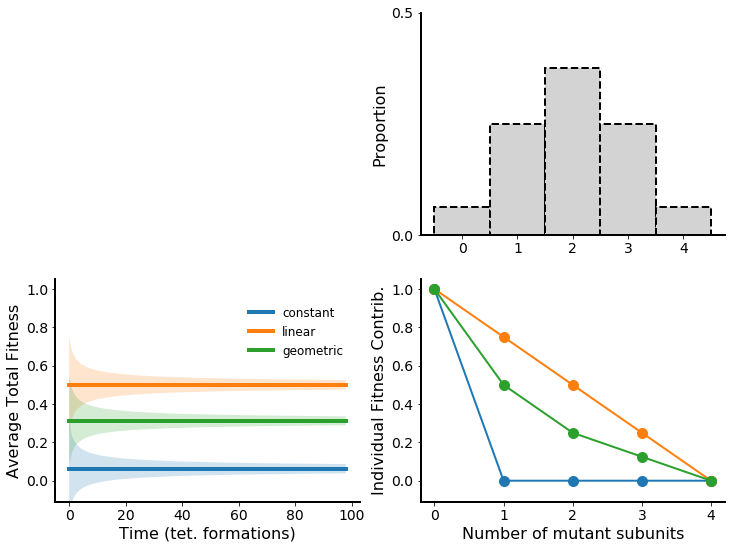

In [2469]:
fig,axs=plt.subplots(2,2,figsize=(12,9)) # 1 row, 2 columns
labels=['constant','linear','geometric'] # model labels


# left plot
ax=axs[1,0] 
colors=['C0','C1','C2']
for i,avg,std in zip(range(3),[const_avg,lin_avg,geo_avg],[fits_const_std,fits_lin_std,fits_geo_std]):
    #ax.axhline(avg,0,99,lw=4,label=labels[i],color=colors[i]) # mean
    ax.plot(range(99),np.repeat(avg,99),lw=4,label=labels[i],color=colors[i])
    ax.fill_between(range(99),avg-std**.5,avg+std**.5,alpha=.2) # std, as envelope
    
ax.set_xlabel('Time (tet. formations)',fontsize=16)
ax.set_ylabel('Average Total Fitness',fontsize=16)
ax.legend(fontsize=12,bbox_to_anchor=[.6, .6],facecolor='w',frameon=False)


#rects = ax.patches

# Make some labels.
#labels = ["1/16","1/4","3/8","1/4","1/16"]
#ax.text(0,.25)

ax = axs[0,1]
#ax2= ax.twinx()
for ax in [axs[1,0],axs[0,1],axs[1,1]]:
    for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
        ax.spines[side].set_linewidth(2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=14)


#axs[1,1].spines['top'].set_visible(False)
#axs[1,1].spines['right'].set_linewidth(2)
#axs[1,1].tick_params(axis='both', which='major', labelsize=14)
#axs[1,1].set_ylim([0,.5])
#axs[0,0].set_ylim([.4,1.])


axs[1,1].plot(np.arange(5),fits_const,lw =2,label='constant',marker='o',markersize=10)
axs[1,1].plot(np.arange(5),fits_lin,lw =2,label='linear',marker='o',markersize=10)
axs[1,1].plot(np.arange(5),fits_geo,lw =2,label='geometric',marker='o',markersize=10)


axs[0,1].set_yticks([0,.5,1])
offs = [-.33,0,+.33]
colors=['C0','C1','C2']
#for i,arr in enumerate([arr_const_min,arr_lin_min,arr_geo_min]):
#    #axs[1].axhline(np.mean(arr[:,0,:]),-.3,1,linestyle='--',alpha=.5,c=colors[i],clip_on =False)
#    axs[0,1].bar(np.arange(5)+offs[i],np.bincount(arr[:,1,:].flatten().astype(int))/len(arr[:,1,:].flatten().astype(int)),
#           .33)
axs[0,1].bar(np.arange(5),P_m,width=1,lw=2,ls="--",edgecolor='k',color='lightgrey',label='Theory')
#for side in axs[1,0].spines.keys():  # 'top', 'bottom', 'left', 'right'
#    axs[1,1].spines[side].set_linewidth(2)

#for i,p in zip(range(5),[1/16,1/4,6/16,1/4,1/16]):
#    axs[1,1].axhline(p,i+0.05,i+.23,linestyle='--',alpha=.5,color='k')
#axs[1,1].axhline(1/16,0.05,.23,linestyle='--',alpha=.5,color='k')
#axs[1,1].axhline(1/4,.23,.41,linestyle='--',alpha=.5,color='k')
#axs[1,1].axhline(6/16,.41,.59,linestyle='--',alpha=.5,color='k')
#axs[1,1].axhline(6/16,.41,.59,linestyle='--',alpha=.5,color='k')
#axs[1,1].axhline(6/16,.41,.59,linestyle='--',alpha=.5,color='k')

axs[1,1].set_ylabel('Individual Fitness Contrib.',fontsize=16)
axs[1,1].set_xlabel('Number of mutant subunits',fontsize=16)
axs[0,1].set_ylabel('Proportion',fontsize=16)
axs[1,1].set_xticks(np.arange(5))
#axs[0,1].axhline(y=.5,linestyle='-',alpha=.5,color='k')
axs[0,0].axis('off')
axs[1,0].set_ylim([-.11,1.05])
axs[1,1].set_ylim([-.11,1.05])
axs[0,1].set_ylim([0,.5])

#axs[1,1].legend(fontsize=12,bbox_to_anchor=[.7, .8],facecolor='w',frameon=False)
#ax.set_xlabel('Time (tet. formations)',fontsize=16)
#ax.set_ylabel('Fitness',fontsize=16)
#ax.legend(fontsize=14,bbox_to_anchor=[1, .5])
plt.savefig('data_fig.pdf')

In [2417]:
std

array([0.0546875 , 0.02734375, 0.01822917, 0.01367188, 0.0109375 ,
       0.00911458, 0.0078125 , 0.00683594, 0.00607639, 0.00546875,
       0.00497159, 0.00455729, 0.00420673, 0.00390625, 0.00364583,
       0.00341797, 0.00321691, 0.00303819, 0.00287829, 0.00273438,
       0.00260417, 0.0024858 , 0.00237772, 0.00227865, 0.0021875 ,
       0.00210337, 0.00202546, 0.00195313, 0.00188578, 0.00182292,
       0.00176411, 0.00170898, 0.0016572 , 0.00160846, 0.0015625 ,
       0.0015191 , 0.00147804, 0.00143914, 0.00140224, 0.00136719,
       0.00133384, 0.00130208, 0.0012718 , 0.0012429 , 0.00121528,
       0.00118886, 0.00116356, 0.00113932, 0.00111607, 0.00109375,
       0.0010723 , 0.00105168, 0.00103184, 0.00101273, 0.00099432,
       0.00097656, 0.00095943, 0.00094289, 0.00092691, 0.00091146,
       0.00089652, 0.00088206, 0.00086806, 0.00085449, 0.00084135,
       0.0008286 , 0.00081623, 0.00080423, 0.00079257, 0.00078125,
       0.00077025, 0.00075955, 0.00074914, 0.00073902, 0.00072

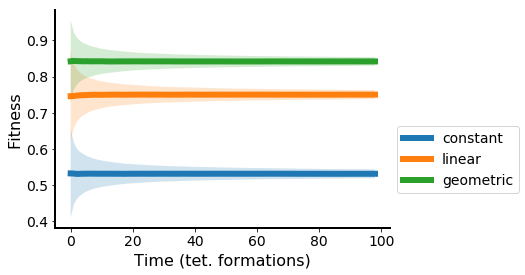

In [835]:

fig,ax=plt.subplots()
labels=['constant','linear','geometric']
for i,arr in enumerate([arr_const_min[:,0,:],arr_lin_min[:,0,:],arr_geo_min[:,0,:]]):
    ax.plot(np.mean(arr,axis=0)[1:],lw=6,label=labels[i])
    ax.fill_between(range(99),np.mean(arr,axis=0)[1:]-np.std(arr,axis=0)[1:],
                     np.std(arr,axis=0)[1:]+np.mean(arr,axis=0)[1:],alpha=.2)
for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax.spines[side].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=14)

ax.set_xlabel('Time (tet. formations)',fontsize=16)
ax.set_ylabel('Fitness',fontsize=16)
ax.legend(fontsize=14,bbox_to_anchor=[1, .5])

In [1628]:
def mut_pop_sim(Ne_arr_,init,fits_,time):
    fits = np.copy(fits_)
    Ne_arr = np.copy(Ne_arr_)

    P_mat =np.ones((len(fits)+1,len(fits)+1))
    P_mat[0,1:]=1-fits


    pop=np.copy(inits)
    Ne=int(np.sum(Ne_arr*pop[1:]/np.sum(pop[1:])) - np.sum(pop[1:]))
    pop[0]=max(0,Ne)

    pop_hist=np.zeros((time,len(fits)+1))
    pop_hist[0] = pop
    rands= np.random.random(time)
    for dt in range(1,time):
        picks = np.random.choice(np.repeat(np.arange(6),pop),2)



        if rands[dt]< P_mat[tuple(picks)]:
            pop[picks[1]]-=1
            if picks[0] <=1:
                pop[picks[0]]+=1
            else:
                pop[picks[0]]-=1
                pop[np.random.randint(2,6)]+=2


        Ne=int(np.sum(Ne_arr*pop[1:]/np.sum(pop[1:])) - np.sum(pop[1:]))
        pop[0]=max(0,Ne)        

        pop_hist[dt] = pop
    return pop_hist
    

In [2472]:
def mut_pop_fix(Ne_arr_,init,fits_):
    fits = np.copy(fits_)
    Ne_arr = np.copy(Ne_arr_)

    P_mat =np.ones((len(fits)+1,len(fits)+1))
    P_mat[0,1:]=1-fits


    pop=np.copy(inits)
    Ne=int(np.sum(Ne_arr*pop[1:]/np.sum(pop[1:])) - np.sum(pop[1:]))
    pop[0]=max(0,Ne)

    #pop_hist=np.zeros((time,len(fits)+1))
    #pop_hist[0] = pop
    #rands= np.random.random(time)
    dt=0
    fixed= False
    while not fixed:
    #for dt in range(1,time):
        picks = np.random.choice(np.repeat(np.arange(6),pop),2)



        if np.random.random()< P_mat[tuple(picks)]:
            pop[picks[1]]-=1
            if picks[0] <=1:
                pop[picks[0]]+=1
            else:
                pop[picks[0]]-=1
                pop[np.random.randint(2,6)]+=2


        Ne=int(np.sum(Ne_arr*pop[1:]/np.sum(pop[1:])) - np.sum(pop[1:]))
        pop[0]=max(0,Ne)        
        dt+=1
        if (pop[1]==0) or (np.sum(pop[2:]) ==0):
            fixed =True

    return pop,dt
    

In [2473]:
fits_lin

array([1.  , 0.75, 0.5 , 0.25, 0.  ])

In [2474]:
N=100
CC_adv = False
w_0=0.5
model = 'linear'
Ne_arr  = np.repeat(N,5)
fits= np.zeros(5)
inits=np.zeros(6,dtype = np.int64)
inits[1:] = (20*np.array(P_m)).astype(int)
if model == 'constant':
    fits[0] = r
    fits[1:] =0
    if CC_adv:
        Ne_arr[1:] = np.repeat(N*(1+w_0),4)


if model == 'linear':
    fits = fits_lin
    if CC_adv:
        Ne_arr = N+np.arange(5)*N*(w_0)/4

if model == 'geo':
    fits = fits_geo
    if CC_adv:
        Ne_arr = (N+ (N*(w_0)/2**4)*2**np.arange(5))

In [2475]:
def run_fix_sims(N,r,w_0,model,CC_adv):
    Ne_arr  = np.repeat(N,5)
    fits= np.zeros(5)
    inits=np.zeros(6,dtype = np.int64)
    inits[1:] = (20*np.array(P_m)).astype(int)
    if model == 'constant':
        fits[1:] = np.repeat(r*(1-w_0),4)
        if CC_adv:
            Ne_arr[1:] = np.repeat(N*(1+w_0),4)
        
        
    if model == 'linear':
        fits = r-np.arange(5)*r*(w_0)/4
        if CC_adv:
            Ne_arr = N+np.arange(5)*N*(w_0)/4
        
    if model == 'geo':
        fits = (r- (r*(w_0)/2**4)*2**np.arange(5))
        if CC_adv:
            Ne_arr = (N+ (N*(w_0)/2**4)*2**np.arange(5))
    
        

    
    
    return mut_pop_fix(Ne_arr,inits,fits)
    

In [2476]:
np.arange(0.01,0.52,0.05)

array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51])

In [ ]:
N=100
r=0.9

w_space =np.arange(0.01,0.52,0.05)
models = np.array(['constant','linear','geo'])
mode_space =np.array([True,False])
samp = 1000
results = np.zeros((samp,len(w_space),len(models),len(mode_space),7))
for n in tqdm(range(samp)):
    for i,w_0 in enumerate(w_space):
        for j,mod in enumerate(models):
            for k,mode in enumerate(mode_space):
                finished= False
                while not finished:
                    try:
                        out= run_fix_sims(N,r,w_0,mod,mode)

                        results[n,i,j,k,:6] = out[0]
                        results[n,i,j,k,6] = out[1]
                        finished= True
                    except:
                        None
                
                
            





  0%|          | 0/1000 [00:00<?, ?it/s]



  0%|          | 1/1000 [00:03<1:02:36,  3.76s/it]



  0%|          | 2/1000 [00:11<1:23:21,  5.01s/it]



  0%|          | 3/1000 [00:17<1:27:27,  5.26s/it]



  0%|          | 4/1000 [00:29<2:02:48,  7.40s/it]



  0%|          | 5/1000 [00:34<1:48:11,  6.52s/it]



  1%|          | 6/1000 [00:39<1:42:19,  6.18s/it]



  1%|          | 7/1000 [00:46<1:45:53,  6.40s/it]



  1%|          | 8/1000 [00:53<1:47:59,  6.53s/it]



  1%|          | 9/1000 [01:00<1:49:21,  6.62s/it]



  1%|          | 10/1000 [01:05<1:42:42,  6.22s/it]



  1%|          | 11/1000 [01:11<1:40:54,  6.12s/it]



  1%|          | 12/1000 [01:18<1:44:24,  6.34s/it]



  1%|▏         | 13/1000 [01:23<1:37:00,  5.90s/it]



  1%|▏         | 14/1000 [01:30<1:45:09,  6.40s/it]



  2%|▏         | 15/1000 [01:39<1:56:16,  7.08s/it]



  2%|▏         | 16/1000 [01:50<2:13:45,  8.16s/it]



  2%|▏         | 17/1000 [01:59<2:18:42,  8.47s/it]



  2%|▏         | 18/1000 [

 12%|█▏        | 121/1000 [41:52<1:43:01,  7.03s/it]



 12%|█▏        | 122/1000 [41:59<1:41:27,  6.93s/it]



 12%|█▏        | 123/1000 [42:06<1:40:50,  6.90s/it]



 12%|█▏        | 124/1000 [42:13<1:42:01,  6.99s/it]



 12%|█▎        | 125/1000 [42:19<1:39:03,  6.79s/it]



 13%|█▎        | 126/1000 [42:26<1:37:12,  6.67s/it]



 13%|█▎        | 127/1000 [42:34<1:44:16,  7.17s/it]



 13%|█▎        | 128/1000 [42:40<1:37:02,  6.68s/it]



 13%|█▎        | 129/1000 [42:50<1:52:45,  7.77s/it]



 13%|█▎        | 130/1000 [42:56<1:44:48,  7.23s/it]



 13%|█▎        | 131/1000 [43:04<1:49:20,  7.55s/it]



 13%|█▎        | 132/1000 [43:11<1:46:47,  7.38s/it]



 13%|█▎        | 133/1000 [43:21<1:57:52,  8.16s/it]



 13%|█▎        | 134/1000 [43:28<1:53:23,  7.86s/it]



 14%|█▎        | 135/1000 [43:34<1:43:10,  7.16s/it]



 14%|█▎        | 136/1000 [43:42<1:46:09,  7.37s/it]



 14%|█▎        | 137/1000 [43:46<1:34:59,  6.60s/it]



 14%|█▍        | 138/1000 [43:53<1:33:49,  6.53s

 24%|██▍       | 241/1000 [54:55<1:24:03,  6.65s/it]



 24%|██▍       | 242/1000 [55:00<1:17:55,  6.17s/it]



 24%|██▍       | 243/1000 [55:07<1:22:00,  6.50s/it]



 24%|██▍       | 244/1000 [55:12<1:15:55,  6.03s/it]



 24%|██▍       | 245/1000 [55:17<1:11:50,  5.71s/it]



 25%|██▍       | 246/1000 [55:22<1:12:00,  5.73s/it]



 25%|██▍       | 247/1000 [55:33<1:29:50,  7.16s/it]



 25%|██▍       | 248/1000 [55:40<1:27:24,  6.97s/it]



 25%|██▍       | 249/1000 [55:46<1:25:07,  6.80s/it]



 25%|██▌       | 250/1000 [55:52<1:23:40,  6.69s/it]



 25%|██▌       | 251/1000 [55:59<1:24:48,  6.79s/it]



 25%|██▌       | 252/1000 [56:05<1:19:41,  6.39s/it]



 25%|██▌       | 253/1000 [56:13<1:27:04,  6.99s/it]



 25%|██▌       | 254/1000 [56:20<1:25:51,  6.91s/it]



 26%|██▌       | 255/1000 [56:29<1:33:31,  7.53s/it]



 26%|██▌       | 256/1000 [56:36<1:33:05,  7.51s/it]



 26%|██▌       | 257/1000 [56:43<1:27:47,  7.09s/it]



 26%|██▌       | 258/1000 [56:47<1:16:39,  6.20s

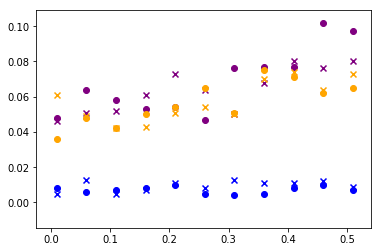

In [2016]:
colors = ['b','purple','orange']
[-]
for w in range(len(w_space)):
    for m in range(len(models)):
        plt.scatter(w_space[w], np.sum(results[:,w,m,1,1]!=0)/len(results[:,w,m,1,1]!=0),c=colors[m],marker='x')
        plt.scatter(w_space[w], np.sum(results[:,w,m,0,1]!=0)/len(results[:,w,m,0,1]!=0),c=colors[m],marker='o')




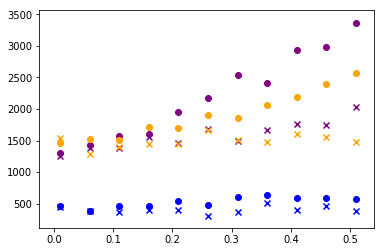

In [2033]:
colors = ['b','purple','orange']
for w in range(len(w_space)):
    for m in range(len(models)):
        plt.scatter(w_space[w],np.mean(results[results[:,w,m,1,1]==0,w,m,1,-1]),c=colors[m],marker='x')
        plt.scatter(w_space[w],np.mean(results[results[:,w,m,0,1]==0,w,m,0,-1]),c=colors[m],marker='o')

In [2034]:
results[:,w,m,1,1]==0

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [2027]:
np.save('pop_gen_results.npy',results)

In [1758]:
N=100
Ne_arr_same  = np.repeat(N,5)
Ne_arr_diff  = np.repeat(N,5)
Ne_arr_diff[1:] = Ne_arr_diff[1:]*1.2
fits_const = np.array([0.9,0.89,0.89,0.89,0.89])
inits=np.zeros(6,dtype = np.int64)
inits[1:] = (N/5*np.array(P_m)).astype(int)
#inits[1:] = np.bincount(np.random.choice(np.arange(5),20,p = np.array(P_m)),minlength=5)
#inits = np.array([0,int(N/2),int(N/2),0,0,0])
time =30000

In [1766]:
mut_pop_fix(Ne_arr_diff,inits,fits_const)

KeyboardInterrupt: 

In [1761]:
out = mut_pop_sim(Ne_arr_same,inits,fits_const,time)

In [1764]:
out[-1]

array([  0., 100.,   0.,   0.,   0.,   0.])

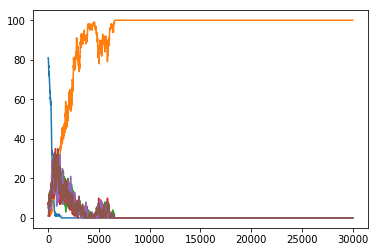

In [1762]:
plt.plot(out)

In [1615]:
samp = 100
arrc_same = np.zeros((samp, time, len(fits_const)+1))
arrc_diff_01 = np.zeros((samp, time, len(fits_const)+1))
arrc_diff_02 = np.zeros((samp, time, len(fits_const)+1))
arrc_diff_03 = np.zeros((samp, time, len(fits_const)+1))
arrc_diff_04 = np.zeros((samp, time, len(fits_const)+1))
for n in range(samp):
    #arrc_same[n] = mut_pop_sim(Ne_arr_same,inits,fits_const,time)
    
    Ne_arr_diff  = np.repeat(N,5)
    Ne_arr_diff[1:] = Ne_arr_diff[1:]*1.01
    arrc_diff_01[n] = mut_pop_sim(Ne_arr_diff,inits,fits_const,time)
    
    Ne_arr_diff  = np.repeat(N,5)
    Ne_arr_diff[1:] = Ne_arr_diff[1:]*1.02
    arrc_diff_02[n] = mut_pop_sim(Ne_arr_diff,inits,fits_const,time)
    
    Ne_arr_diff  = np.repeat(N,5)
    Ne_arr_diff[1:] = Ne_arr_diff[1:]*1.03
    arrc_diff_03[n] = mut_pop_sim(Ne_arr_diff,inits,fits_const,time)
    
    Ne_arr_diff  = np.repeat(N,5)
    Ne_arr_diff[1:] = Ne_arr_diff[1:]*1.04
    arrc_diff_04[n] = mut_pop_sim(Ne_arr_diff,inits,fits_const,time)
    


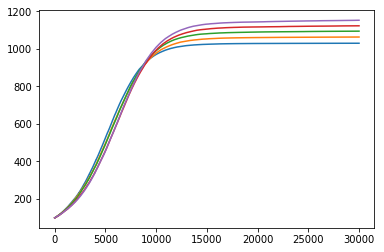

In [1627]:
#plt.plot(np.mean(arrc_same,axis=0)[:,1])
#plt.plot(np.mean(arrc_diff_05,axis=0)[:,1])
#plt.plot(np.mean(arrc_diff_1,axis=0)[:,1])
#plt.plot(np.mean(arrc_diff_15,axis=0)[:,1])
#plt.plot(np.mean(arrc_diff_2,axis=0)[:,1])
#plt.plot(np.mean(arrc_diff_25,axis=0)[:,1])
#plt.plot(np.sum(np.mean(arrc_same,axis=0)[,1:],axis=1))
plt.plot(np.sum(np.mean(arrc_diff_05,axis=0)[:,1:],axis=1))
plt.plot(np.sum(np.mean(arrc_diff_1,axis=0)[:,1:],axis=1))
plt.plot(np.sum(np.mean(arrc_diff_15,axis=0)[:,1:],axis=1))
plt.plot(np.sum(np.mean(arrc_diff_2,axis=0)[:,1:],axis=1))
plt.plot(np.sum(np.mean(arrc_diff_25,axis=0)[:,1:],axis=1))


/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


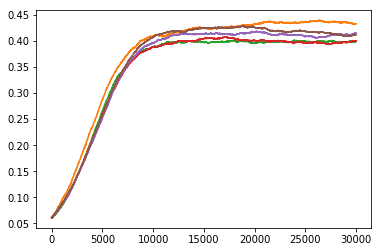

In [1617]:
plt.plot(np.mean(arrc_same,axis=0)[:,1]/np.sum(np.mean(arrc_same,axis=0)[:,1:],axis=1))
plt.plot(np.mean(arrc_diff_05,axis=0)[:,1]/np.sum(np.mean(arrc_diff_05,axis=0)[:,1:],axis=1))
plt.plot(np.mean(arrc_diff_1,axis=0)[:,1]/np.sum(np.mean(arrc_diff_1,axis=0)[:,1:],axis=1))
plt.plot(np.mean(arrc_diff_15,axis=0)[:,1]/np.sum(np.mean(arrc_diff_15,axis=0)[:,1:],axis=1))
plt.plot(np.mean(arrc_diff_2,axis=0)[:,1]/np.sum(np.mean(arrc_diff_2,axis=0)[:,1:],axis=1))
plt.plot(np.mean(arrc_diff_25,axis=0)[:,1]/np.sum(np.mean(arrc_diff_25,axis=0)[:,1:],axis=1))


#plt.plot(np.sum(np.mean(arrc_same,axis=0)[:,1:],axis=1))
#plt.plot(np.sum(np.mean(arrc_diff,axis=0)[:,1:],axis=1))
#plt.plot(np.mean(arrc_diff,axis=0)[:,1])

In [ ]:
np.array([0.9,0.39])

In [1603]:
-np.arange(5)*.102 +.9

SyntaxError: invalid syntax (<ipython-input-1603-b8945ec447df>, line 1)

In [1595]:
N=1000
Ne_arr_same  = np.repeat(N,5)
Ne_arr_diff  = np.repeat(N,5)
Ne_arr_diff[1:] = Ne_arr_diff[1:]*1.2
#fits_const = np.array([0.9,0.39,0.39,0.39,0.39])
fits_lin = -np.arange(5)*.102 +.9
inits=np.zeros(6,dtype = np.int64)
inits[1:] = (N/10*np.array(P_m)).astype(int)
#inits = np.array([0,int(N/2),int(N/2),0,0,0])
time =30000

SyntaxError: unexpected EOF while parsing (<ipython-input-1595-c3d4eb9e41ed>, line 1)

In [ ]:
samp = 100
arrc_same = np.zeros((samp, time, len(fits_const)+1))
arrc_diff_05 = np.zeros((samp, time, len(fits_const)+1))
arrc_diff_1 = np.zeros((samp, time, len(fits_const)+1))
arrc_diff_15 = np.zeros((samp, time, len(fits_const)+1))
arrc_diff_2 = np.zeros((samp, time, len(fits_const)+1))
arrc_diff_25 = np.zeros((samp, time, len(fits_const)+1))
for n in range(samp):
    arrc_same[n] = mut_pop_sim(Ne_arr_same,inits,fits_const,time)
    
    Ne_arr_diff  = np.repeat(N,5)
    Ne_arr_diff[1:] = Ne_arr_diff[1:]*1.05
    arrc_diff_05[n] = mut_pop_sim(Ne_arr_diff,inits,fits_const,time)
    
    Ne_arr_diff  = np.repeat(N,5)
    Ne_arr_diff[1:] = Ne_arr_diff[1:]*1.1
    arrc_diff_1[n] = mut_pop_sim(Ne_arr_diff,inits,fits_const,time)
    
    Ne_arr_diff  = np.repeat(N,5)
    Ne_arr_diff[1:] = Ne_arr_diff[1:]*1.15
    arrc_diff_15[n] = mut_pop_sim(Ne_arr_diff,inits,fits_const,time)
    
    Ne_arr_diff  = np.repeat(N,5)
    Ne_arr_diff[1:] = Ne_arr_diff[1:]*1.2
    arrc_diff_2[n] = mut_pop_sim(Ne_arr_diff,inits,fits_const,time)
    
    Ne_arr_diff  = np.repeat(N,5)
    Ne_arr_diff[1:] = Ne_arr_diff[1:]*1.25
    arrc_diff_25[n] = mut_pop_sim(Ne_arr_diff,inits,fits_const,time)

In [1851]:
N=100
Ne_arr_same  = np.repeat(N,5)
Ne_arr_  = np.repeat(N,5)
#Ne_arr_[1:] = Ne_arr_[1:]*1.2

fits_ = np.array([0.9,0.39,0.39,0.39,0.39])
inits=np.zeros(6,dtype = np.int64)
inits[1:] = (N/5*np.array(P_m)).astype(int)
#inits[1:] = np.bincount(np.random.choice(np.arange(5),20,p = np.array(P_m)),minlength=5)
#inits = np.array([0,int(N/2),int(N/2),0,0,0])
time =30000

In [1856]:
fits = np.copy(fits_)
Ne_arr = np.copy(Ne_arr_)

P_mat =np.ones((len(fits)+1,len(fits)+1))
P_mat[0,1:]=1-fits


pop=np.copy(inits)
Ne=int(np.sum(Ne_arr*pop[1:]/np.sum(pop[1:])) - np.sum(pop[1:]))
pop[0]=max(0,Ne)

#pop_hist=np.zeros((time,len(fits)+1))
#pop_hist[0] = pop
rands= np.random.random(time)
dt=0
fixed =False
while not fixed:
#for dt in range(1,time):
    picks = np.random.choice(np.repeat(np.arange(6),pop),2)



    if np.random.random()< P_mat[tuple(picks)]:
        pop[picks[1]]-=1
        if picks[0] <=1:
            pop[picks[0]]+=1
        else:
            pop[picks[0]]-=1
            pop[np.random.randint(2,6)]+=2


    Ne=int(np.sum(Ne_arr*pop[1:]/np.sum(pop[1:])) - np.sum(pop[1:]))
    pop[0]=max(0,Ne)        
    dt+=1
    if (pop[1]==0) or (np.sum(pop[2:]) ==0):
        fixed =True

In [1857]:
pop

array([49,  0,  6, 15, 12, 18])

In [1800]:
dt

29999

In [1804]:
(pop[1]!=0)

True

In [1805]:
(np.sum(pop[2:])!=0)

False

In [1845]:
while 
    print(5)

In [1846]:
 0!=0

False

In [1828]:
5!=0

True

In [1848]:
if pop[1]==0 or np.sum(pop[2:]) ==0:
    fixed =True

In [1849]:
fixed

True